In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
import torch
from skimage.transform import resize
from sklearn.preprocessing import normalize
import random
from skimage import transform
def data_aug(image,label,angel=30,resize_rate=0.9):
    flip = random.randint(0, 1)
    size = image.shape[0]
    rsize = random.randint(np.floor(resize_rate*size),size)
    w_s = random.randint(0,size - rsize)
    h_s = random.randint(0,size - rsize)
    sh = random.random()/2-0.25
    rotate_angel = random.random()/180*np.pi*angel
    # Create Afine transform
    afine_tf = transform.AffineTransform(shear=sh,rotation=rotate_angel)
    # Apply transform to image data
    image = transform.warp(image, inverse_map=afine_tf,mode='edge')
    label = transform.warp(label, inverse_map=afine_tf,mode='edge')
    # Randomly corpping image frame
    image = image[w_s:w_s+size,h_s:h_s+size,:]
    label = label[w_s:w_s+size,h_s:h_s+size]
    # Ramdomly flip frame
    if flip:
        image = image[:,::-1,:]
        label = label[:,::-1]
    return image, label
def gen_flip_rots(image,label):
    new_images = []
    new_labels = []
    flip_image = image[:,::-1]
    flip_label = label[:,::-1]
    for i in range(4):
        new_labels.append(np.rot90(label,i))
        new_images.append(np.rot90(image,i))
        new_labels.append(np.rot90(flip_label,i))
        new_images.append(np.rot90(flip_image,i))
    return new_images,new_labels
        

(275, 1000, 1000)


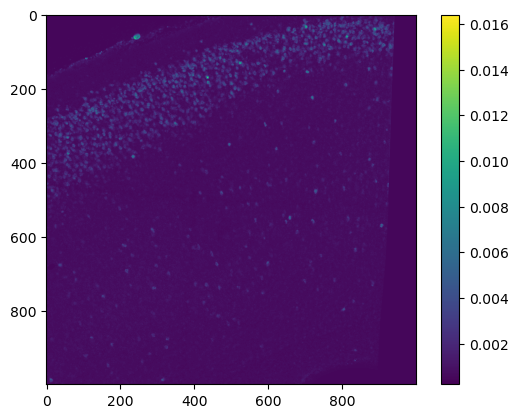

In [3]:
# deals with the dumb fucking gene images
X_data = []
PATH = 'gene_images'
for i in range(1,16,1):
    if i not in [2,10,14,15]:
        file_name = 'Gene' + str(i) + ".tif"
        im = Image.open(PATH + '/' + file_name)
        for j in range(im.n_frames):
            im.seek(j)
            temp = np.array(im)
            temp = resize(temp,(1000,1000))
            X_data.append(temp)
            if(i==10 and j==0):
                print(len(X_data))
X_data = np.array(X_data)
X_data = X_data.flatten().reshape(275, 1000*1000)
X_data = normalize(X_data)
X_data = X_data.reshape(275, 1000,1000)
plt.imshow(X_data[0])
plt.colorbar()
np.save('gene_images_norm_large',X_data)
print(X_data.shape)


In [34]:
# deals with the dumb fucking masks 
# just like in perrrrsona 
y_data = []
PATH = 'mask_images'
for i in range(1,16,1):
    file_name = PATH + '/' + 'Gene' + str(i) + "_Object Predictions.h5"
    with h5py.File(file_name, 'r') as f:
        for j in range(25):
            im = f['exported_data'][j]
            temp = np.array(im)
            temp = resize(temp,(1000,1000))
            y_data.append(temp)
y_data = np.array(y_data)
np.save('mask_images_large',y_data)

In [4]:
# deals with the new, less screwed up? masks 
y_data = []
#                 1       2       3         4          5         6         7         8          9     10      11       12         13       
list_thing = ['1_3_8_13',' ', '1_3_8_13','4_5_7_9','4_5_7_9','6_11_12','4_5_7_9','1_3_8_13','4_5_7_9',' ','6_11_12','6_11_12','1_3_8_13']
PATH = 'mask'
for i in range(1,14,1):
    if i not in [2,10,14,15]:
        for j in range(25):
            file_name = PATH + '/' + list_thing[i-1] + '_Mask_' + str(j) + '.npy'
            temp = np.load(file_name)
            temp = resize(temp, (1000, 1000))
            y_data.append(temp>0.001)
y_data = np.array(y_data)
print(y_data.shape)
np.save('mask_images_large',y_data)

(275, 1000, 1000)


In [87]:
with h5py.File('Gene1_Object_Predictions.h5', 'r') as f:
    print(list(f.keys()))
    #print(f['exported_data'][1,6,9,0]
    stuff = f['exported_data'][0]
    print(stuff.shape)
    stuff = resize(stuff, (500, 500))
    plt.imshow(stuff)
    plt.colorbar()


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'Gene1_Object_Predictions.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Labels:
['exported_data']
(2006, 2005, 1)


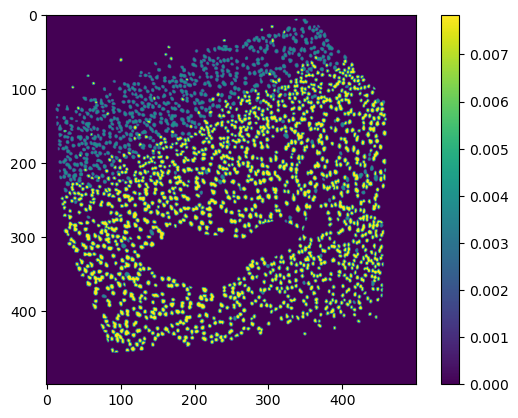

In [99]:
### data visuzalistion satuff

# open the file as 'f'
print('Labels:')
with h5py.File('mask_images/Gene1_Object Predictions.h5', 'r') as f:
    print(list(f.keys()))
    #print(f['exported_data'][1,6,9,0]
    stuff = f['exported_data'][0]
    print(stuff.shape)
    stuff = resize(stuff, (500, 500))
    plt.imshow(stuff)
    plt.colorbar()



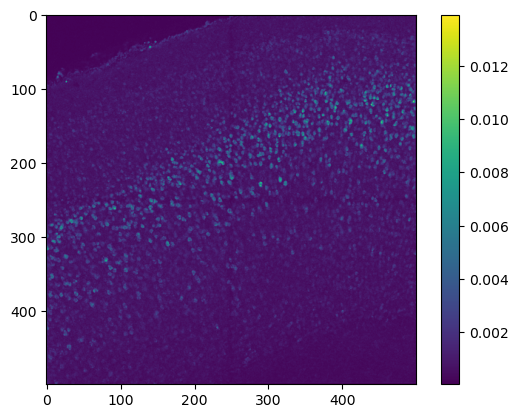

In [14]:
im = Image.open('gene_images/Gene12.tif')
im.seek(10)
im = np.array(im)
im = resize(im,(500,500))
plt.imshow(im)
plt.colorbar()

(375, 500, 500, 1)


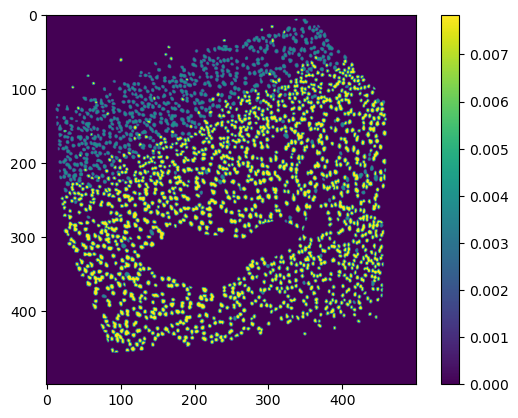

In [85]:
stuff = np.load('mask_images.npy')
print(stuff.shape)
plt.imshow(stuff[0])
plt.colorbar()

(275, 500, 500)
(275, 250000)
(275, 250000)


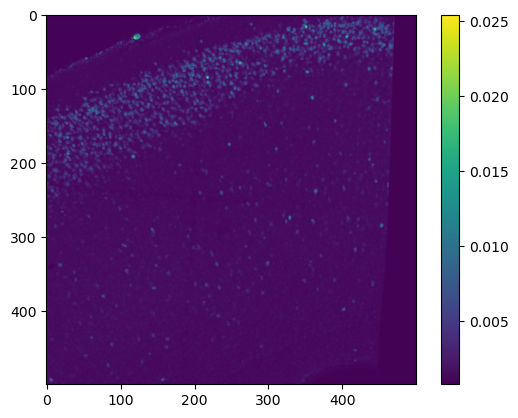

In [11]:
moar = np.load('gene_images.npy')
print(moar.shape)
moar = moar.flatten().reshape(275, 500*500)
print(moar.shape)
moar = normalize(moar)
print(moar.shape)
moar = moar.reshape(275, 500,500)
plt.imshow(moar[0])
plt.colorbar()
np.save('gene_images_norm',moar)

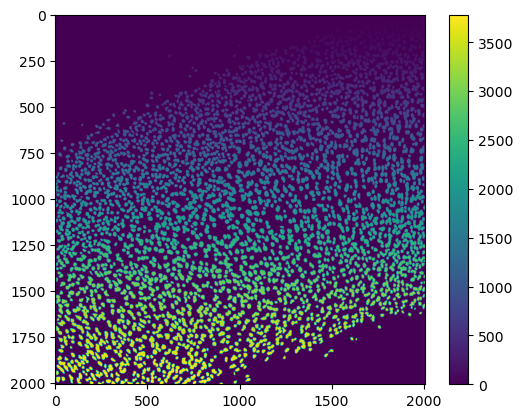

In [39]:
thing = np.load('mask/1_3_8_13_Mask_0.npy')
plt.imshow(thing)
plt.colorbar()

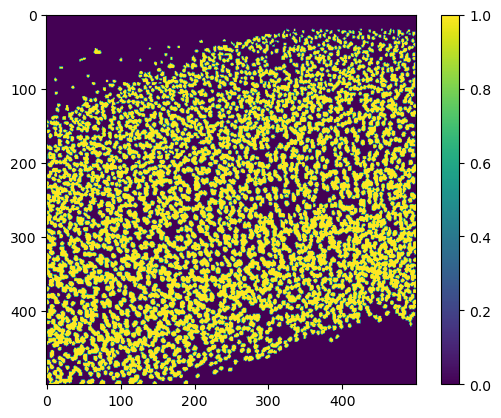

In [38]:
thing = np.load('mask_images.npy')
plt.imshow(thing[100])
plt.colorbar()

In [20]:
masks = np.load('mask_images.npy')
zero_mask = (masks[7]<=0).T
ones_mask = (masks[7]>0).T
print(zero_mask.shape)
print(ones_mask.shape)
new_thing = np.dstack((zero_mask,ones_mask))
print(new_thing.shape)

(500, 500)
(500, 500)
(500, 500, 2)


In [2]:
# rotato rotato i eat the potato 
new_images = []
new_labels = []
images = np.load('real_data/gene_images_norm.npy')
labels = np.load('real_data/mask_images.npy')
print(images.shape)
for i in range(images.shape[0]):
    temp_images,temp_labels = gen_flip_rots(images[i],labels[i])
    for j in range(len(temp_images)):
        new_images.append(temp_images[j])
        new_labels.append(temp_labels[j])
#new_labels = np.array(new_labels)
new_images = np.array(new_images)
#print(new_labels.shape)
print(new_images.shape)

(275, 500, 500)
(2200, 500, 500)


In [4]:
#np.save('real_data/mask_images_aug',new_labels)
np.save('real_data/gene_images_aug',new_images)
old_images = np.load('real_data/gene_images_norm.npy')


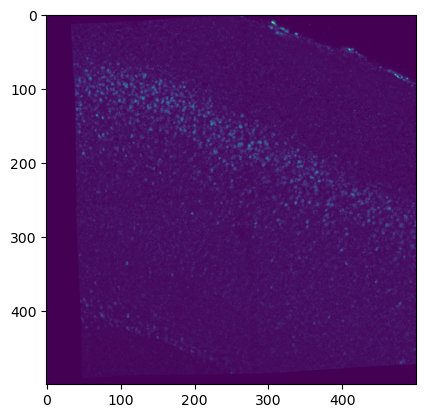

In [7]:
plt.imshow(new_images[1025])